<a href="https://colab.research.google.com/github/drishtihanda/Marketing-Campaign-A-B-Testing/blob/main/Marketing_A_B_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Marketing A/B Testing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('marketing_AB.csv')

In [ ]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [ ]:
#Check if we have duplicates with respect to user id
df.duplicated(subset='user id').sum()

0

In [ ]:
df.drop(columns = ['Unnamed: 0', 'user id'], axis = 1, inplace= True)

In [ ]:
df.head()

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14


In [ ]:
# Checking the unique values
df_cat = df[['test group', 'converted', 'most ads day', 'most ads hour']]
df_cat.nunique()

,0
test group,2
converted,2
most ads day,7
most ads hour,24


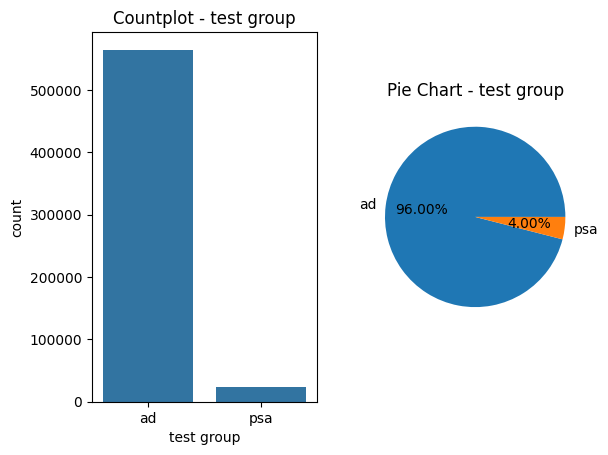

In [ ]:
# Univariate Analysis - test group

plt.subplot(1,2,1)
sns.countplot(x = 'test group', data = df_cat)
plt.title(f'Countplot - test group')

plt.subplot(1,2, 2)
counts = df_cat['test group'].value_counts()
plt.pie(counts, labels = counts.index, autopct= '%0.2f%%')
plt.title('Pie Chart - test group')

plt.show()

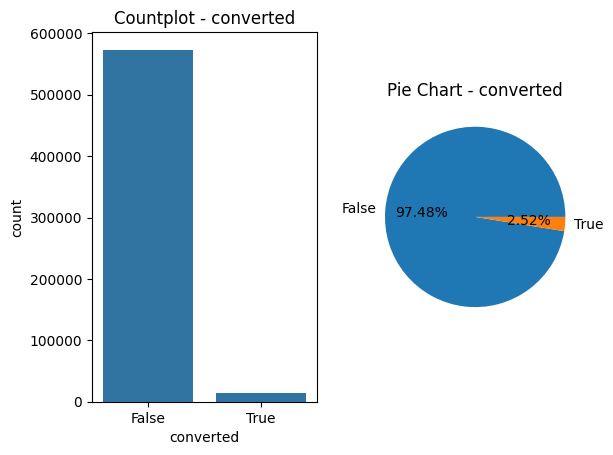

In [ ]:
# Univariate Analysis - converted

plt.subplot(1,2,1)
sns.countplot(x = 'converted', data = df_cat)
plt.title(f'Countplot - converted')

plt.subplot(1,2, 2)
counts = df_cat['converted'].value_counts()
plt.pie(counts, labels = counts.index, autopct= '%0.2f%%')
plt.title('Pie Chart - converted')

plt.show()

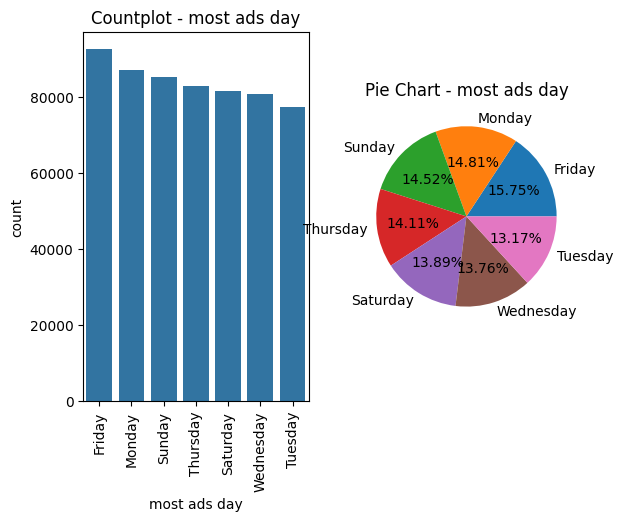

In [ ]:
# Univariate Analysis - most ads day

plt.subplot(1,2,1)
sns.countplot(x = 'most ads day', data = df_cat, order = df_cat['most ads day'].value_counts().index)
plt.title(f'Countplot - most ads day')
plt.xticks(rotation = 90)

plt.subplot(1,2, 2)
counts = df_cat['most ads day'].value_counts()
plt.pie(counts, labels = counts.index, autopct= '%0.2f%%')
plt.title('Pie Chart - most ads day')

plt.show()

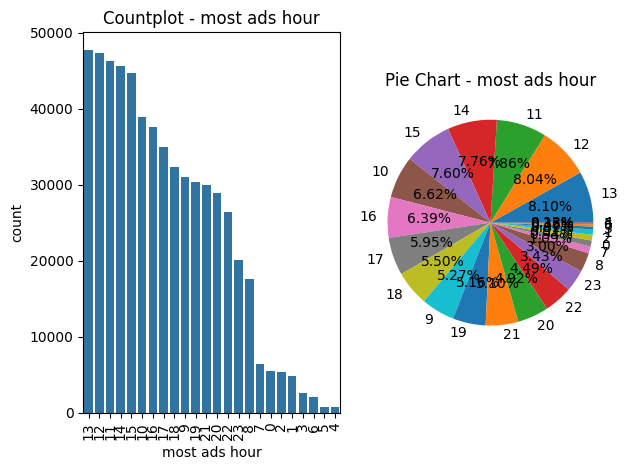

In [ ]:
# Univariate Analysis - most ads hour

plt.subplot(1,2,1)
sns.countplot(x = 'most ads hour', data = df_cat, order = df_cat['most ads hour'].value_counts().index)
plt.title(f'Countplot - most ads hour')
plt.xticks(rotation = 90)

plt.subplot(1,2, 2)
counts = df_cat['most ads hour'].value_counts()
plt.pie(counts, labels = counts.index, autopct= '%0.2f%%')
plt.title('Pie Chart - most ads hour')

plt.tight_layout()
plt.show()

In [ ]:
df['total ads'].describe()

,total ads
count,588101.000000
mean,24.820876
std,43.715181
min,1.000000
25%,4.000000
50%,13.000000
75%,27.000000
max,2065.000000


In [ ]:
# Bivariate analysis

test group  converted
ad          False        550154
            True          14423
psa         False         23104
            True            420
Name: count, dtype: int64

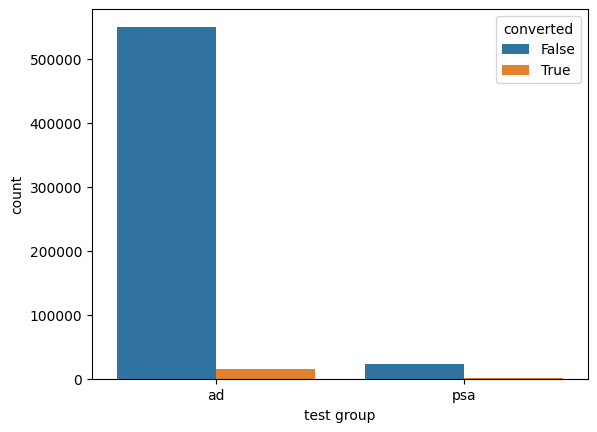

In [ ]:
sns.countplot(x = 'test group', hue = 'converted', data = df_cat)
df_cat.groupby('test group')['converted'].value_counts()

In [ ]:
ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize = 'index') # index - divided the number by total number in rows
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


In [ ]:
# out of the total people who have seen ads only 2.5% people have purchased. out of the total peole who have seen general announcement only 1.78% have purchased.

<Axes: xlabel='test group'>

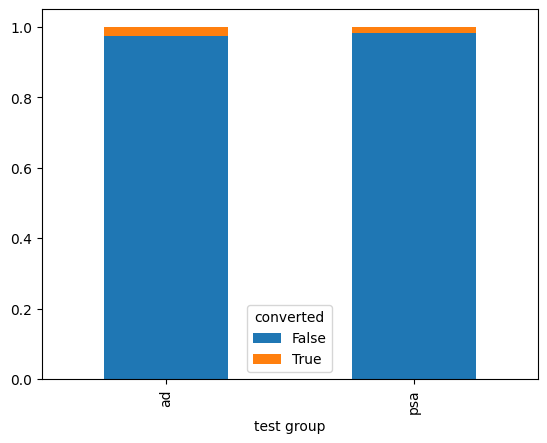

In [ ]:
ct_conversion_test_group.plot.bar(stacked = 'True')

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<Axes: xlabel='most ads day'>

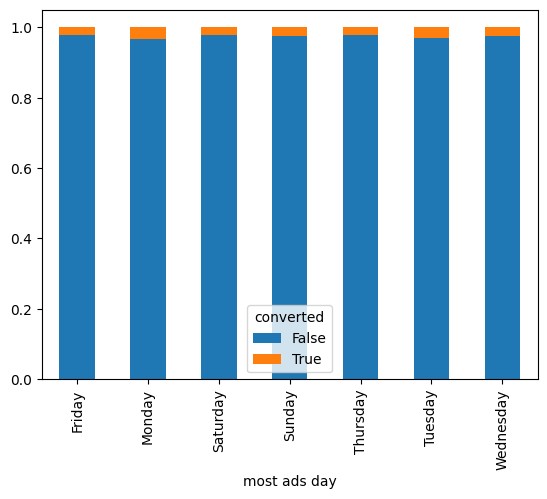

In [ ]:
ct_conversion_days = pd.crosstab(df['most ads day'], df['converted'], normalize = 'index') # index - divided the number by total number in rows
print(ct_conversion_days.sort_values(by = True, ascending = False))
ct_conversion_days.plot.bar(stacked = 'True')

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<Axes: xlabel='most ads hour'>

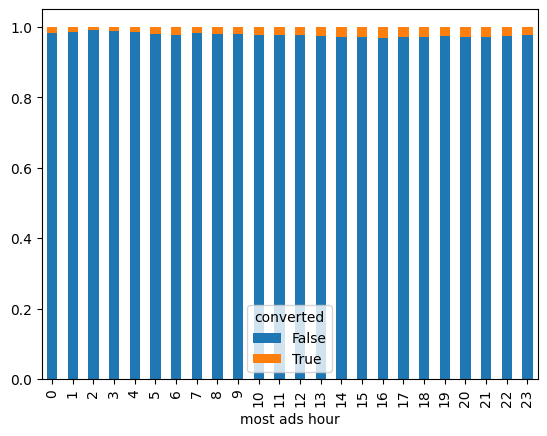

In [ ]:
ct_conversion_hours = pd.crosstab(df['most ads hour'], df['converted'], normalize = 'index') # index - divided the number by total number in rows
print(ct_conversion_hours.sort_values(by = True, ascending = False))
ct_conversion_hours.plot.bar(stacked = 'True')

<Axes: xlabel='converted', ylabel='total ads'>

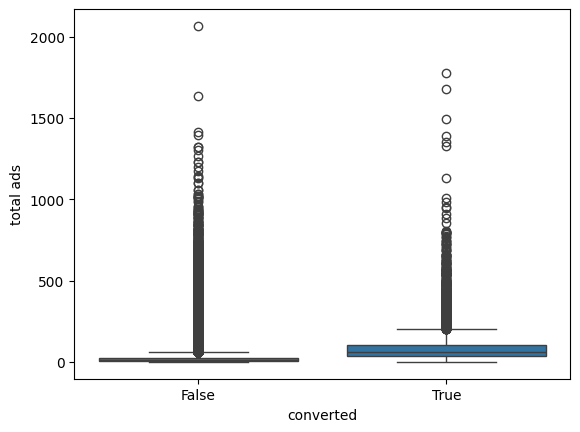

In [ ]:
sns.boxplot(x = 'converted', y = 'total ads', data = df)

<Axes: xlabel='converted', ylabel='total ads'>

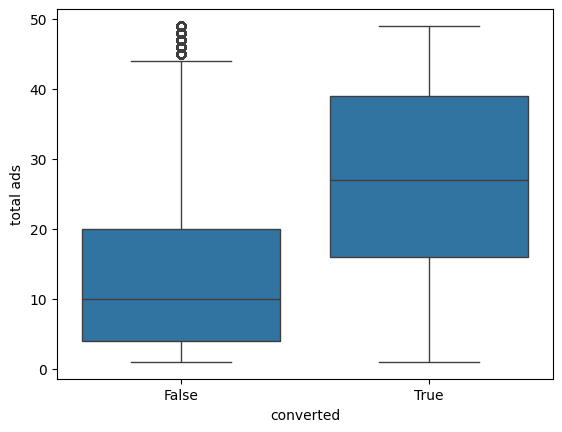

In [ ]:
sns.boxplot(x = 'converted', y = 'total ads', data =df[df['total ads']< 50])

In [ ]:
# It can be seen that the people who have not converted have seen less total no. of adds than those who converted. - repeated targetting is important

In [ ]:
# Statistical Tests

from scipy.stats import chi2_contingency
alpha = 0.05
for variable in df_cat.columns:
    if variable != 'converted':
       contingency_table = pd.crosstab(df[variable], df['converted'])
       chi2_test_statistic, p_value, degrees_of_freedom, expected_frequency_array = chi2_contingency(contingency_table) # chi-squared test

       print(f'Variable: {variable}')
       print(f'Chi-squared test statistic: {chi2_test_statistic}')
       print(f'P-value: {p_value}')
       print(f'Degrees of freedom: {degrees_of_freedom}')

    # H_0: There is no statistical significance in conversion rates accros different categorical variables
    # H_a: There is statistical significance in conversion rates accros different categorical variables

       if p_value< alpha:
           print(f'Reject the null hypothesis - There is statistical significance in conversion rates accros {variable}')
       else:
           print(f'Fail to reject the null hypothesis - There is no statistical significance in conversion rates accros {variable}')

Variable: test group
Chi-squared test statistic: 54.005823883685245
P-value: 1.9989623063390075e-13
Degrees of freedom: 1
Reject the null hypothesis - There is statistical significance in conversion rates accros test group
Variable: most ads day
Chi-squared test statistic: 410.0478857936585
P-value: 1.932184379244731e-85
Degrees of freedom: 6
Reject the null hypothesis - There is statistical significance in conversion rates accros most ads day
Variable: most ads hour
Chi-squared test statistic: 430.76869230822086
P-value: 8.027629823696771e-77
Degrees of freedom: 23
Reject the null hypothesis - There is statistical significance in conversion rates accros most ads hour


In [ ]:
# 1) Showing the ad makes a difference in the conversion rate.
# 2) It depends on what day of the week the ad is being shown.
# 3) At what time of the day the ad is being shown also makes a difference in the conversion rate.

In [ ]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

# Step 1Checking Assymptions

#Normality Assumption

shapiro_stat_true, p_value_true = shapiro(df[df['converted'] == True]['total ads'])
shapiro_stat_false, p_value_false = shapiro(df[df['converted'] == False]['total ads'])

print(f"Shapiro-Wilk test for normailty of converted == True: {p_value_true}")
print(f"Shapiro-Wilk test for normailty of converted == False: {p_value_false}")

# Equality of Variance Assumption
# Levene - Used to assess if variances are equal across multiple groups.

levene_stat, levene_p_value = levene(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
print(f"Levene test for equality of variance: {levene_p_value}")

Shapiro-Wilk test for normailty of converted == True: 1.638680987007771e-98
Shapiro-Wilk test for normailty of converted == False: 9.883049430735801e-204
Levene test for equality of variance: 0.0


H_0 (Null Hypothesis): There is no statistical significance in the mean total ads between ad group and PSA group

H_A (Alternative Hypothesis) : There is a statistical significance in the mean total ads between ad group and PSA group

In [ ]:
# Step 2 Perform a suitable test
alpha = 0.05

if p_value_true > alpha and p_value_false > alpha and levene_p_value > alpha: # Assumptions are met - use t-test for means
   t_stat, p_value = ttest_ind(df[df['converted'] == True]['total ads'], df[df['converted'] == False]['total ads'])
   print(f"Independent two-sample t-test: p=value {p_value}")
else:
  # Assumptions not met - use Mann-Whitney U test
  u_stat, u_p_value   = mannwhitneyu(df[df['converted'] == True]['total ads'], df[df['converted'] == False]['total ads'])
  print(f"Mann-Whitney U test: p=value {u_p_value}")

Mann-Whitney U test: p=value 0.0


Since the assumptions in Step1 are violated, we perform the Mann-Whitney U Test. The obtained p-value= 0.00 is below the significance level of 0.05, leading to the rejection of the null hypothesis. This indicates a significant difference in the mean total ads between the ad group and the PSA group.